In [1]:
!pip install opencv-python
!pip install matplotlib
!pip install pytesseract
!pip install pandas

import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


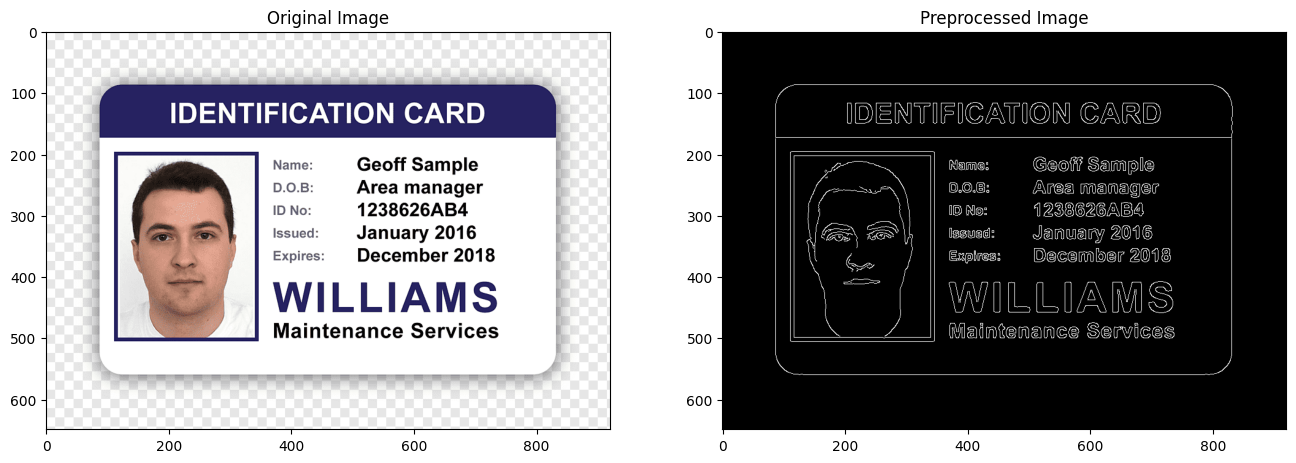

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract


pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the image
img = cv2.imread('C:\\Users\\user\\Desktop\\Dev\\AI\\ID_card2.PNG')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge detection using Canny
edges = cv2.Canny(blurred, 50, 150)



    
    
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Preprocessed Image')
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
plt.show()


    



    



In [24]:
import pandas as pd

custom_config = r'--oem 3 --psm 4'
text = pytesseract.image_to_string(img, config=custom_config)
print("Extracted Text:\n", text)

lines = text.split('\n')
data = {}


for line in lines:
    if "Name" in line:
        if ':' in line:
            data['Name'] = line.split(':', 1)[1].strip()
        else:
            data['Name'] = line.strip()
    elif "ID Number" in line or "ID No" in line or "ID" in line:
        if ':' in line:
            data['ID Number'] = line.split(':', 1)[1].strip()
    elif "Date of Birth" in line or "D.0.B" in line or "D.O.B" in line:
        if ':' in line:
            data['Date of Birth'] = line.split(':', 1)[1].strip()

# Convert dictionary to DataFrame
    df = pd.DataFrame([data])


# Display DataFrame
print(df)

Extracted Text:
 IDENTIFICATION CARD

Name: Geoff Sample f
D.0.B: Area manager
ID No: 1238626AB4
Issued: January 2016 |
Expires: December 2018 |

WILLIAMS |

Maintenance Services |


             Name Date of Birth   ID Number
0  Geoff Sample f  Area manager  1238626AB4
